# Importing Libraries

✅ Explanation:
We import all required libraries:

TensorFlow and Keras — for building neural networks

Pandas, NumPy — for data handling and mathmatical oprations

Matplotlib — for plotting images and graphs

random — for picking a random test image

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Loading and preparing the data

In [ ]:
#import dataset and split into train and test
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


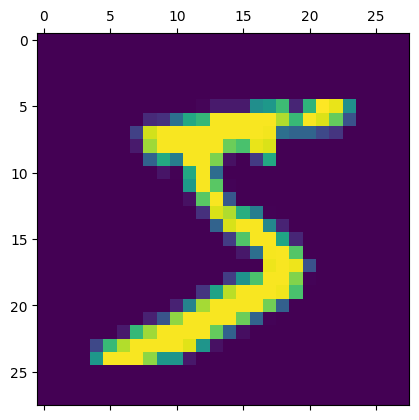

In [ ]:
#to see how first image looks
plt.matshow(x_train[0])

In [ ]:
#normalising the images by scaling the pixel intensities to the range 0 to 1  Normalizing helps faster and better training.
x_train = x_train / 255
x_test = x_test / 255

# Creating the Model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [ ]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the Model

In [ ]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7378 - loss: 1.0287 - val_accuracy: 0.9034 - val_loss: 0.3579
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9009 - loss: 0.3594 - val_accuracy: 0.9194 - val_loss: 0.2910
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9156 - loss: 0.2956 - val_accuracy: 0.9286 - val_loss: 0.2593
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9274 - loss: 0.2647 - val_accuracy: 0.9331 - val_loss: 0.2366
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9349 - loss: 0.2347 - val_accuracy: 0.9376 - val_loss: 0.2170
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9391 - loss: 0.2193 - val_accuracy: 0.9431 - val_loss: 0.2014
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9447 - loss: 0.2003 - val_accuracy: 0.9448 - val_loss: 0.1906
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9480 - loss: 0.1893 - 

# Evaluate the Model

In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9466 - loss: 0.1876
Loss = 0.161
Accuracy = 0.955


# Making Prediction on New Data
✅ Explanation:

Displays a random image from test set

Predicts all test labels

Converts predictions to actual class numbers

Displays confusion matrix

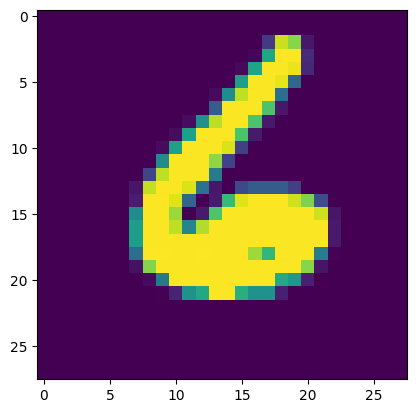

In [ ]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

# Confusion Matrix

In [ ]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 961    0    1    1    0    5    8    1    3    0]
 [   0 1117    3    1    1    1    4    1    7    0]
 [   4    2  982   11    9    2    6    7    9    0]
 [   0    1    8  971    0    9    1    9    8    3]
 [   1    0    5    2  939    0    9    3    3   20]
 [   7    2    1   19    2  836   10    2    7    6]
 [   7    3    4    1    5   10  926    1    1    0]
 [   2    7   21    7    5    2    0  970    1   13]
 [   4    3    4   16    6   10   10    9  908    4]
 [   7    6    2   13   22    6    1   10    2  940]], shape=(10, 10), dtype=int32)
